In [1]:
import pandas as pd             # Bring in the Pandas Package
import numpy as np              # Numberical Python, we will use this at the end.
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt # Our plotting tool

In [2]:
url = "https://github.com/mwaugh0328/Data_Bootcamp_Fall_2017/raw/master/data_bootcamp_1030/pwt_inclass.csv"                   # Here is the correct link
pwt = pd.read_csv(url, encoding = "latin1")  

In [3]:
pwt["gdp_pop"] = pwt["rgdpe"] / pwt["pop"] # This makes GDP per person or ``average income in that country''

pwt_2005 = pwt.set_index("year").loc[2005]        # This will get me just the 2005 year...

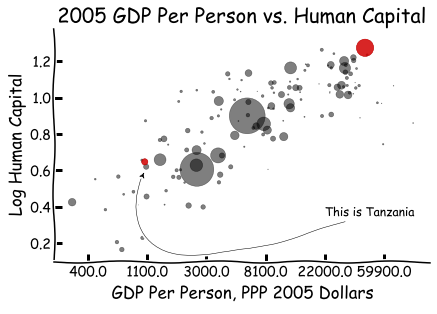

In [43]:
plt.xkcd()

fig, ax = plt.subplots()

ax.scatter(np.log(pwt_2005["gdp_pop"]), np.log(pwt_2005["hc"]), # np.log() is taking a natural log transformation...
            s=pwt_2005['pop'], # THE NEW PART HERE! 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

country = ["USA", "TZA"]

ax.scatter(np.log(pwt_2005.set_index("countrycode").loc[country]["gdp_pop"]),
           np.log(pwt_2005.set_index("countrycode").loc[country]["hc"]), # np.log() is taking a natural log transformation...
            s=pwt_2005.set_index("countrycode").loc[country]["pop"], # THE NEW PART HERE! 
            alpha= 0.70,
            color = "red") # Then this last command specifies how dark or light the bubbles are...


ax.set_title("2005 GDP Per Person vs. Human Capital")
ax.set_ylabel("Log Human Capital") 
ax.set_xlabel("GDP Per Person, PPP 2005 Dollars")

xlabel_list = np.exp(range(5,13)) # Now creat the list of lables by converting 5,6,etc. to levels
                                  # by taking exp.
xlabel_list = np.round(xlabel_list,-2) # Then round it so it looks nice.

##############################################################################33


ax.annotate(
    "This is Tanzania", 
    xy=(np.log(1050), 0.6), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(np.log(22000), 0.35), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=20,angleB=70",
        "color": "black"
    },
    fontsize=12,
)

##############################################################################



ax.set_xticklabels(xlabel_list) # Then set the xtick labels.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("hc.png", bbox_inches="tight", dpi = 600)

plt.show()

In [20]:
# Here is an example to get a handle on this:

data_ex = {"Year": [2010,2010,2011,2011],
            "GDP": [1 , 2 , 3, 4],
            "INV": [10, 12, 13, 14],
            "CNT": ["USA", "ARG", "USA", "ARG"]}

weo  = pd.DataFrame(data_ex)

#print(weo.groupby("Year").sum())
#print(weo.groupby("Year").mean())

In [21]:
weo

,CNT,GDP,INV,Year
0,USA,1,10,2010
1,ARG,2,12,2010
2,USA,3,13,2011
3,ARG,4,14,2011


In [24]:
weo.groupby("CNT").mean()

,GDP,INV,Year
CNT,,,
ARG,3.0,13.0,2010.5
USA,2.0,11.5,2010.5


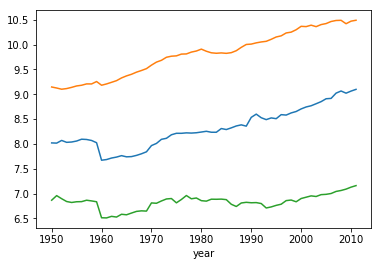

In [26]:
med = np.log(pwt.groupby("year").gdp_pop.median()) # This will compute the median, across countries, within a year

q90 = np.log(pwt.groupby("year").gdp_pop.quantile(0.90)) # This is going to compute the 90th percentile

q10 = np.log(pwt.groupby("year").gdp_pop.quantile(0.10)) # This is going to compute teh 10th percentile


fig, ax  = plt.subplots()

med.plot(ax = ax)

q90.plot(ax = ax)

q10.plot(ax = ax)

plt.show()

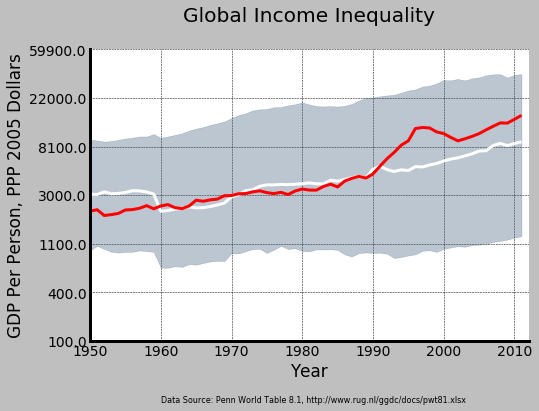

In [42]:
plt.style.use('grayscale')
#plt.xkcd()
# Here are some styles to trr
# 'fivethirtyeight' ,ggplot, bmh, dark_background, and grayscale


fig, ax  = plt.subplots()

med.plot(ax = ax, color = "white", lw = 3, figsize = (7,5))

ax.fill_between(med.index, q10, q90, color = "#3F5D7D", alpha = 0.35) 
# This is the new option, we specify the x-axis, in this case the index,
# color in the areas between the bottom q10
# and the top, q90. Then I got this color from Randy olson blog, I like it.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

###############################################################
# This is the new part

ax.plot(med.index, np.log(pwt[pwt.countrycode == "ARG"].gdp_pop), color = 'r', lw = 3)

# just plot on top, the x-axis, Korea's GDP per person, color, line width...

###############################################################

ax.set_yticks(range(5,12))
ax.set_xlim(1950,2012)
# This sets the yticks so we can see center the graph in the middle

y_label_list = np.exp(range(5,12))
y_label_list = np.round(y_label_list,-2)

ax.set_yticklabels(y_label_list)
# This process above generates informative labels for the y-axis
# so its not in log units, but in dollars

ax.set_title("Global Income Inequality\n") 
ax.set_ylabel("GDP Per Person, PPP 2005 Dollars")
ax.set_xlabel("Year")

ax.text(1960, 3.75, "Data Source: Penn World Table 8.1, " 
        "http://www.rug.nl/ggdc/docs/pwt81.xlsx", fontsize = 8)

plt.show() 